In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
X ,y=make_regression(n_samples=100 , n_features=1 ,n_informative=1  , n_targets=1 , noise=20 , random_state=13)

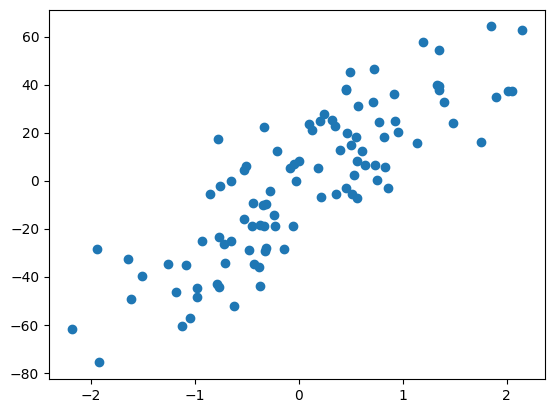

In [4]:
plt.scatter(X ,y)

In [6]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [7]:
from sklearn.linear_model import Ridge
rr=Ridge()
rr1=rr.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[27.51130507]
-2.276241917183367


In [8]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)


[12.93442104]
-1.4248441496033308


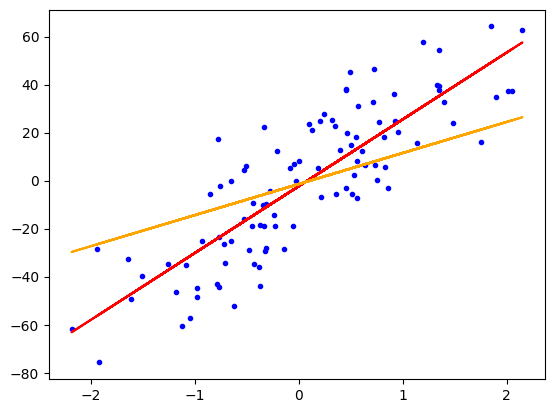

In [11]:
plt.plot(X ,y,'b.')
plt.plot(X,lr.predict(X) , color='red', label='alpha-0')
plt.plot(X ,rr1.predict(X) , color="orange" , label="alpha=100")

In [12]:
def linear_regression(X,y,alpha=1):
    x_mean = X.mean()
    y_mean = y.mean()

    num = 0
    den = 0

    for i in range(X.shape[0]):
        num = num + (y[i] - y_mean) * (X[i] - x_mean)
        den = den + (X[i] - x_mean) * (X[i] - x_mean)

    m = num/(den + alpha)
    b = y_mean - m*x_mean

    return m,b

In [ ]:
#ridge class from scratch

In [ ]:
class MeraRidge:

    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None

    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())

        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)

    def predict(X_test):
        pass

reg = MeraRidge(alpha=100)
reg.fit(X,y)

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np



In [14]:
X,y=load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split

In [15]:
X_train ,X_test ,y_train ,y_test=train_test_split(X ,y,test_size=0.2 ,random_state=32)

In [16]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(penalty='l2' , max_iter=500 , eta0=0.1 , learning_rate='constant',alpha=0.01 )

In [19]:
sgd.fit(X_train,y_train)

y_pred = sgd.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(sgd.coef_)
print(sgd.intercept_)

R2 score 0.2916658037435942
[ 34.80296759 -18.06216234 143.01335314 107.62624241  22.85938443
  10.02847317 -83.71014949  74.98495314 127.76530226  79.41362953]
[153.73355486]


In [21]:
from sklearn.linear_model import Ridge


reg = Ridge(alpha=0.001, max_iter=500,solver='sparse_cg')

In [22]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

R2 score 0.4524554377346707
[  32.72599802 -273.61596152  501.84426836  368.47256635 -724.32189961
  426.62500611   58.66088978  147.31173001  707.41289354   79.47831185]
154.2888887544202


In [23]:
class MeraRidgeGD:

    def __init__(self,epochs,learning_rate,alpha):

        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):

        self.coef_ = np.ones(X_train.shape[1])
        self.intercept_ = 0
        thetha = np.insert(self.coef_,0,self.intercept_)

        X_train = np.insert(X_train,0,1,axis=1)

        for i in range(self.epochs):
            thetha_der = np.dot(X_train.T,X_train).dot(thetha) - np.dot(X_train.T,y_train) + self.alpha*thetha
            thetha = thetha - self.learning_rate*thetha_der

        self.coef_ = thetha[1:]
        self.intercept_ = thetha[0]

    def predict(self,X_test):

        return np.dot(X_test,self.coef_) + self.intercept_

In [24]:
reg = MeraRidgeGD(epochs=500,alpha=0.001,learning_rate=0.005)


In [25]:
reg.fit(X_train,y_train)

y_pred = reg.predict(X_test)
print("R2 score",r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)



R2 score 0.45045402505409504
[  42.36041614 -215.68230982  464.91718264  335.03893799  -41.73436032
  -99.53920806 -206.38362282  116.31139773  391.73200619  139.13569187]
154.04921561009908


### lasso regression


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

[27.40790208]
-3.0240301302544736


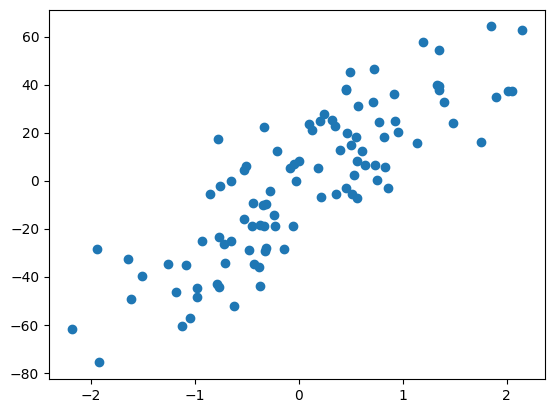

In [26]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

In [28]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [29]:
X,y = load_diabetes(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [30]:
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568968

In [31]:
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.45199494197195456

In [32]:
# Lasso
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)


0.44111855963110613

In [33]:

# ElasticNet
reg = ElasticNet(alpha=0.005,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)


0.4531474541554823